# Importando Bibliotecas

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Carregando os dados
dados = pd.read_csv('Analise_de_credito.csv', sep=';')

In [ ]:
dados.head()

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,good
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,bad
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,good
3,4,<0,existing paid,42,7882,2,4,45,1,2,good
4,5,<0,delayed previously,24,4870,3,4,53,2,2,bad


# Conhecendo os dados

In [ ]:
#(Linhas, Colunas)
dados.shape

(1000, 11)

In [ ]:
#Nome das Colunas
dados.columns

Index(['ID', 'checking_status', 'credit_history', 'duration', 'credit_amount',
       'installment_commitment', 'residence_since', 'age', 'existing_credits',
       'num_dependents', 'class'],
      dtype='object')

In [ ]:
dados['class'].unique()

array(['good', 'bad'], dtype=object)

In [ ]:
dados['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

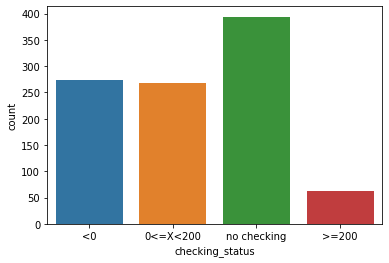

In [ ]:
sns.countplot(x='checking_status', data=dados)
plt.show()

In [ ]:
dados['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

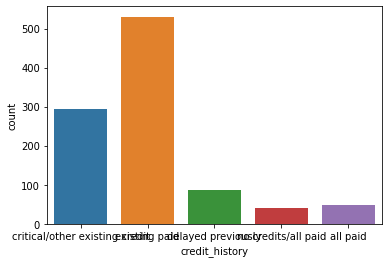

In [ ]:
sns.countplot(x='credit_history', data=dados)
plt.show()

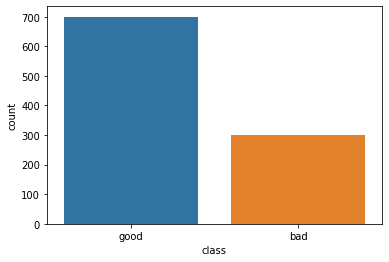

In [ ]:
sns.countplot(x='class', data=dados)
plt.show()

In [ ]:
#Verificando se existe dados NULL no dataset
dados.isnull().sum()

ID                        0
checking_status           0
credit_history            0
duration                  0
credit_amount             0
installment_commitment    0
residence_since           0
age                       0
existing_credits          0
num_dependents            0
class                     0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      1000 non-null   int64 
 1   checking_status         1000 non-null   object
 2   credit_history          1000 non-null   object
 3   duration                1000 non-null   int64 
 4   credit_amount           1000 non-null   int64 
 5   installment_commitment  1000 non-null   int64 
 6   residence_since         1000 non-null   int64 
 7   age                     1000 non-null   int64 
 8   existing_credits        1000 non-null   int64 
 9   num_dependents          1000 non-null   int64 
 10  class                   1000 non-null   object
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


# Tratando os dados

In [ ]:
#Excluindo coluna desnecessária - ID
del dados['ID']

In [ ]:
#Transformando as Colunas 'class' em Numérico
Classe = pd.get_dummies(dados['class'], drop_first=True)
#Classe

In [ ]:
#Renomeando tudo que for igual á '<0' para Negativo
dados['checking_status'][dados['checking_status'] =='<0'] = 'Negativo'

#dados['checking_status'][dados['checking_status'] == 'Negativo']

In [ ]:
dados['checking_status'][dados['checking_status'] !='Negativo'] = 'Positivo'

#dados['checking_status'][dados['checking_status'] == 'Positivo']

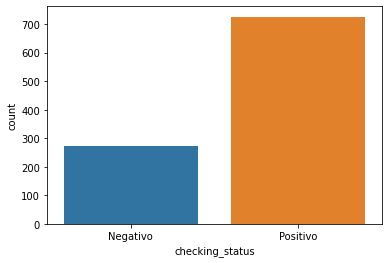

In [ ]:
sns.countplot(x='checking_status', data=dados)
plt.show()

In [ ]:
#Transformando a Coluna 'checking_status' em Numérico
Checking_S = pd.get_dummies(dados['checking_status'], drop_first=True)
#Checking_S

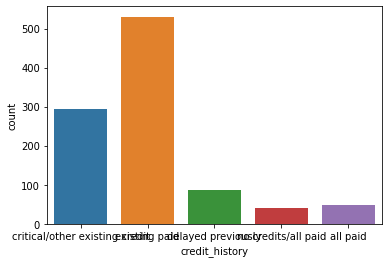

In [ ]:
sns.countplot(x='credit_history', data=dados)
plt.show()

In [ ]:
dados['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

In [ ]:
#Transformando a Coluna 'credit_history'
dados['credit_history'][dados['credit_history'] =='existing paid'] = 'Existente Pago'
dados['credit_history'][dados['credit_history'] =='no credits/all paid'] = 'Sem crédito'
dados['credit_history'][dados['credit_history'] =='all paid'] = 'Em dias'
dados['credit_history'][dados['credit_history'] =='delayed previously'] = 'Em Atraso'
dados['credit_history'][dados['credit_history'] =='critical/other existing credit'] = 'Critico'

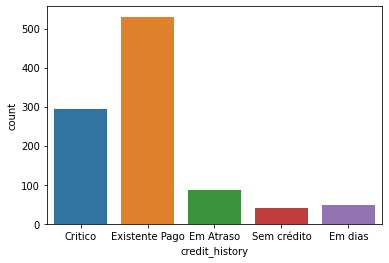

In [ ]:
sns.countplot(x='credit_history', data=dados)
plt.show()

In [ ]:
#Transformando a Coluna 'credit_history' em Numérico
Credit_H = pd.get_dummies(dados['credit_history'], drop_first=True)
Credit_H

,Em Atraso,Em dias,Existente Pago,Sem crédito
0,0,0,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
995,0,0,1,0
996,0,0,1,0
997,0,0,1,0
998,0,0,1,0


In [ ]:
#Deletando colunas inicias
dados.drop(['class','checking_status','credit_history'], axis=1,inplace=True)

In [ ]:
#Concatenando com as colunas trasformadas
dados = pd.concat([dados,Classe,Checking_S,Credit_H],axis=1)

In [ ]:
dados.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,good,Positivo,Em Atraso,Em dias,Existente Pago,Sem crédito
0,6,1169,4,4,67,2,1,1,0,0,0,0,0
1,48,5951,2,2,22,1,1,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,0,1,0
4,24,4870,3,4,53,2,2,0,0,1,0,0,0


In [ ]:
#Renomeando dataset
dados.columns = ['Duração', 'Qtd_de_Crédito', 'Parcelamento', 'Cliente_desde', 'Idade', 'Linha_Crédito_existente', 'Dependentes', 'Status_cliente', 'Saldo','Em Atraso','Em dias','Existente Pago','Sem crédito']

In [ ]:
dados.head()

,Duração,Qtd_de_Crédito,Parcelamento,Cliente_desde,Idade,Linha_Crédito_existente,Dependentes,Status_cliente,Saldo,Em Atraso,Em dias,Existente Pago,Sem crédito
0,6,1169,4,4,67,2,1,1,0,0,0,0,0
1,48,5951,2,2,22,1,1,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,0,1,0
4,24,4870,3,4,53,2,2,0,0,1,0,0,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Duração                  1000 non-null   int64
 1   Qtd_de_Crédito           1000 non-null   int64
 2   Parcelamento             1000 non-null   int64
 3   Cliente_desde            1000 non-null   int64
 4   Idade                    1000 non-null   int64
 5   Linha_Crédito_existente  1000 non-null   int64
 6   Dependentes              1000 non-null   int64
 7   Status_cliente           1000 non-null   uint8
 8   Saldo                    1000 non-null   uint8
 9   Em Atraso                1000 non-null   uint8
 10  Em dias                  1000 non-null   uint8
 11  Existente Pago           1000 non-null   uint8
 12  Sem crédito              1000 non-null   uint8
dtypes: int64(7), uint8(6)
memory usage: 60.7 KB


In [ ]:
y = dados['Status_cliente']

del dados['Status_cliente']

X = dados

In [ ]:
#Separando dados de treino e teste
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

# Preparação Para o GridSearch

# GridSearch Árvore

In [ ]:
decision_tree = DecisionTreeClassifier()

In [ ]:
profundidade = [10, 15, 20, 50, 100]
criterio = ['gini', 'entropy']

melhor_entropy = 0
melhor_modelo = None


for p in profundidade:
  for c in criterio:

          cart = DecisionTreeClassifier (criterion= c, max_depth=p)
          cart.fit(X_train, y_train)
          prev_train = cart.predict(X_train)
          melhor_train = metrics.accuracy_score(y_train, prev_train)
          
          if melhor_train > melhor_entropy:
            melhor_entropy = melhor_train
            melhor_modelo = cart
            print("Melhor Modelo:", melhor_modelo)

Melhor Modelo: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Melhor Modelo: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Melhor Modelo: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_

In [ ]:
melhor_cart = melhor_modelo

# GridSearch KNN

In [ ]:
k = [1, 3, 5, 7, 9] #Usando valores impares para caso de empate
distancia = ['euclidean', 'manhattan']
peso = ['uniform','distance']

melhor_vizinho = 0
melhor_modelo = None

for k in k:
  for d in distancia:
    for p in peso:

          knn = KNeighborsClassifier (n_neighbors=k, metric=d, weights=p)
          knn.fit(X_train, y_train)
          prev_train = knn.predict(X_train)
          melhor_train = metrics.accuracy_score(y_train, prev_train)
          
          if melhor_train > melhor_vizinho:
            melhor_vizinho = melhor_train
            melhor_modelo = knn
            print("Melhor Modelo:", melhor_modelo)

Melhor Modelo: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
melhor_vizinho = melhor_modelo

# GridSearch MLP

In [ ]:
neuronios = [1, 10, 15, 20, 50, 100]
funcAtivacao = ['identity', 'logistic', 'tanh', 'relu']
algoTreinamento = ['sgd', 'adam']
taxaDeAprendizado = [0.001, 0.0001]

melhor_acuracy = 0
melhor_modelo = None
num_exe = 5


for n in neuronios:
  for f in funcAtivacao:
    for a in algoTreinamento:
      for tx in taxaDeAprendizado:

        for i in range(0, num_exe):


          mlp = MLPClassifier (hidden_layer_sizes=n,  activation=f, solver=a, learning_rate_init=tx )
          mlp.fit(X_train, y_train)
          prev_train = mlp.predict(X_train)
          melhor_train = metrics.accuracy_score(y_train, prev_train)
          
          if melhor_train > melhor_acuracy:
            melhor_acuracy = melhor_train
            melhor_modelo = mlp
            print("Melhor Modelo:", melhor_modelo)

Melhor Modelo: MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Melhor Modelo: MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0

In [ ]:
melhor_mlp = melhor_modelo

# Modelagem

# Árvore de Decisão

In [ ]:
predict_train_cart = melhor_cart.predict(X_train)

# KNN

In [ ]:
y_pred = melhor_vizinho.predict(X_train)

# MLP


In [ ]:
predict_train_mlp = melhor_mlp.predict(X_train)

# Resultado Treinamento

In [ ]:
acc_cart = metrics.accuracy_score(y_train, predict_train_cart)
acc_knn = metrics.accuracy_score(y_train, y_pred)
acc_mlp = metrics.accuracy_score(y_train, predict_train_mlp)
print("ACC da MLP em Treinamento", acc_mlp * 100)
print("ACC do KNN em Treinamento", acc_knn * 100)
print("ACC da Árvore em Treinamento", acc_cart * 100)

ACC da MLP em Treinamento 72.26666666666667
ACC do KNN em Treinamento 100.0
ACC da Árvore em Treinamento 100.0


# Resultado Teste

In [ ]:
cart_pred_test = cart.predict(X_test)
knn_pred_test = knn.predict(X_test)
mlp_pred_test = mlp.predict(X_test)

In [ ]:
acc_cart = metrics.accuracy_score(y_test, cart_pred_test)
acc_knn = metrics.accuracy_score(y_test, knn_pred_test)
acc_mlp = metrics.accuracy_score(y_test, mlp_pred_test)

In [ ]:
print("ACC da Arvore em Teste %.2f" %(acc_cart * 100))
print("ACC do KNN em Teste %.2f" %(acc_knn * 100))
print("ACC da MLP em Teste %.2f" %(acc_mlp * 100))

ACC da Arvore em Teste 65.20
ACC do KNN em Teste 64.80
ACC da MLP em Teste 70.40


<BarContainer object of 3 artists>

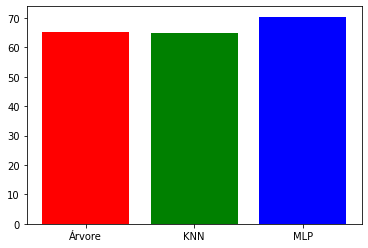

In [ ]:
plt.bar(['Árvore', 'KNN', 'MLP'],[acc_cart*100, acc_knn*100, acc_mlp*100], color=['r', 'g', 'b'])